In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.dihedrals import Dihedral, Janin, Ramachandran
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os

In [2]:
topo = '/mnt/c/Users/thier/Desktop/1ubq_frame.pdb'
test_list = ["test_001", "test_002", "test_003", "test_004"]

full_traj1 = '/home/mlehner/1ubq/test_001/run_001/traj_4us_PBC_fit.xtc'
full_traj2 = '/home/mlehner/1ubq/test_002/run_001/traj_4us_PBC_fit.xtc'
full_traj3 = '/home/mlehner/1ubq/test_003/run_001/traj_4us_PBC_fit.xtc'
full_traj4 = '/home/mlehner/1ubq/test_004/run_001/traj_4us_PBC_fit.xtc'

#traj_list = [full_traj1, full_traj2, full_traj3, full_traj4]

In [3]:
isoleucines = [3,13, 23, 30, 36, 44, 61]

In [4]:
def bin_dihedral_angles(angle):
    bins = np.arange(0, 360, 120)
    bin_number = np.digitize(angle, bins)
    return (bin_number-1)*120+60

In [5]:
def get_traj_data(topo, traj_path):
    u = mda.Universe(topo, traj_path)
    r_ile = u.select_atoms("resname ILE")
    J = Janin(r_ile).run()
    chi1 = pd.DataFrame(J.results.angles[:, :, 0], columns = isoleucines)
    chi2 = pd.DataFrame(J.results.angles[:, :, 1], columns = isoleucines)
    return chi1, chi2

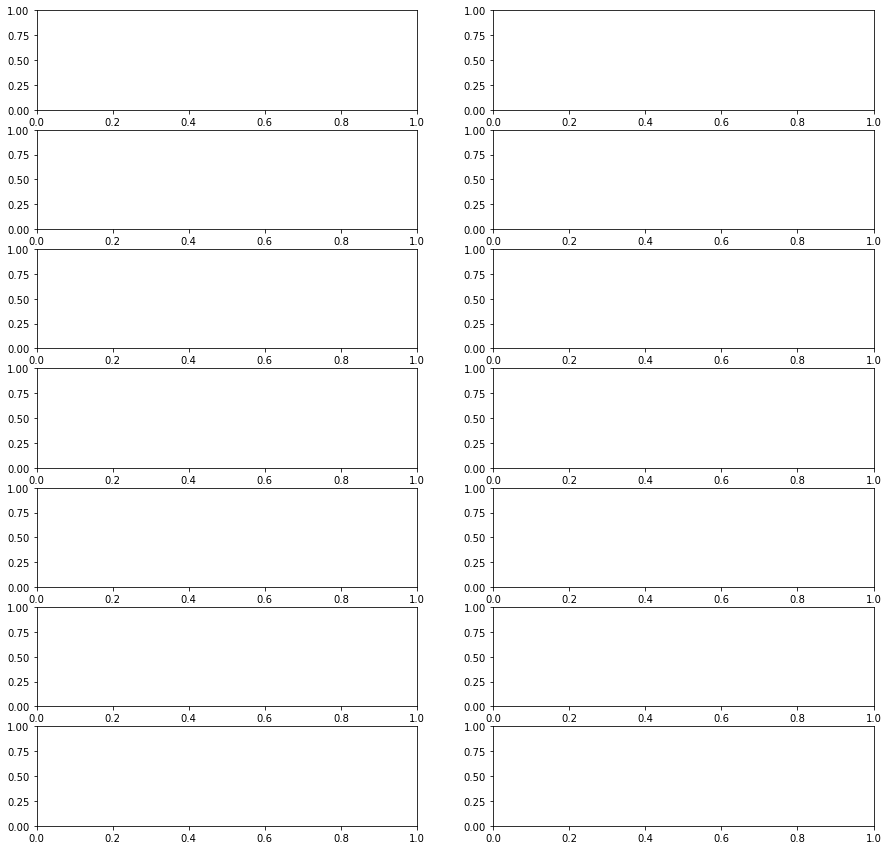

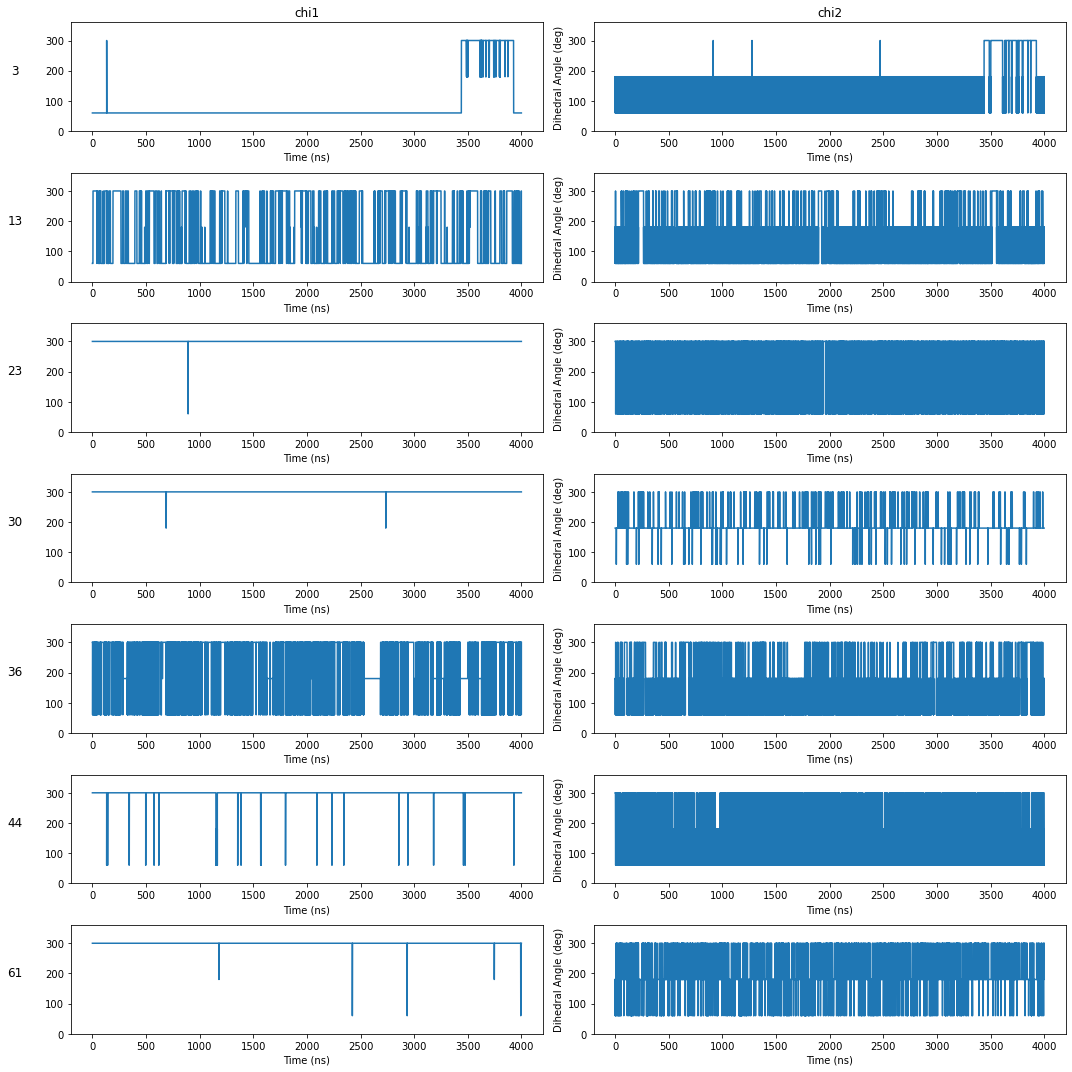

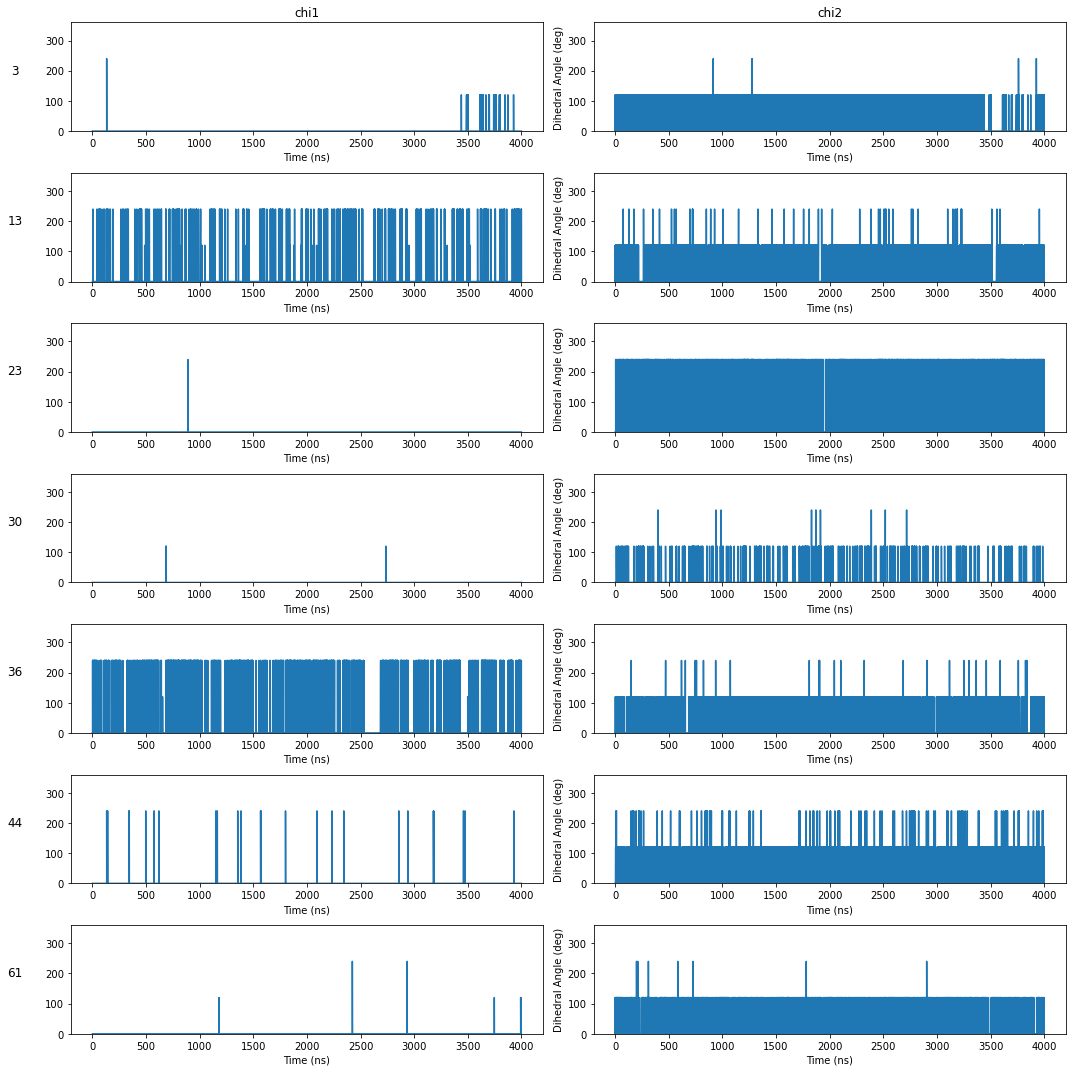

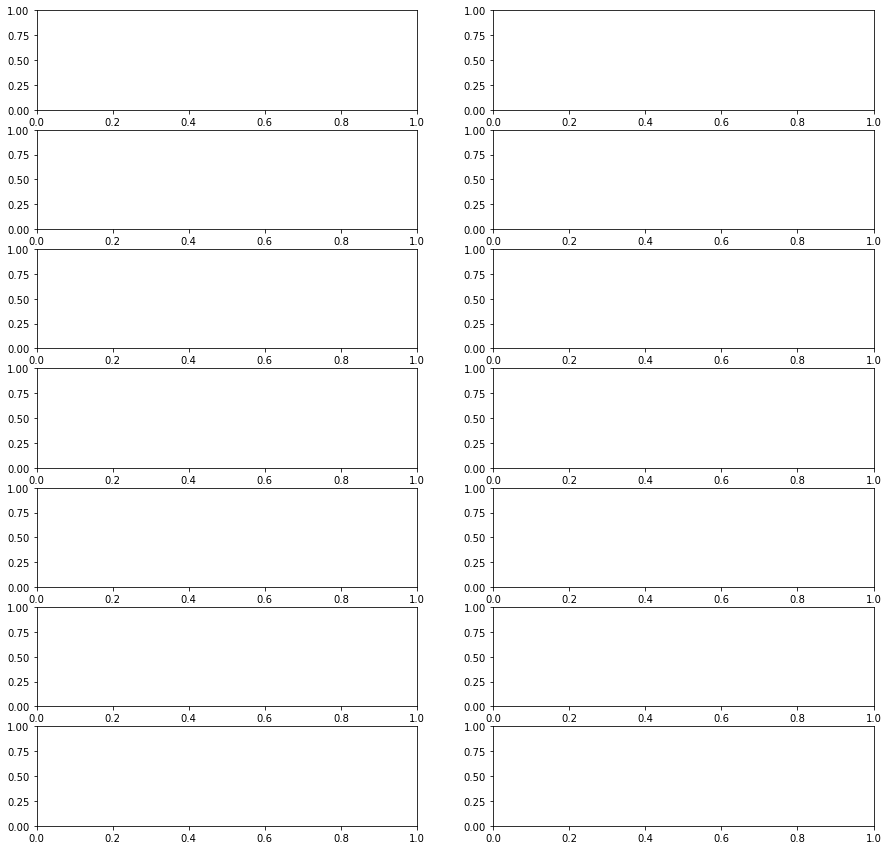

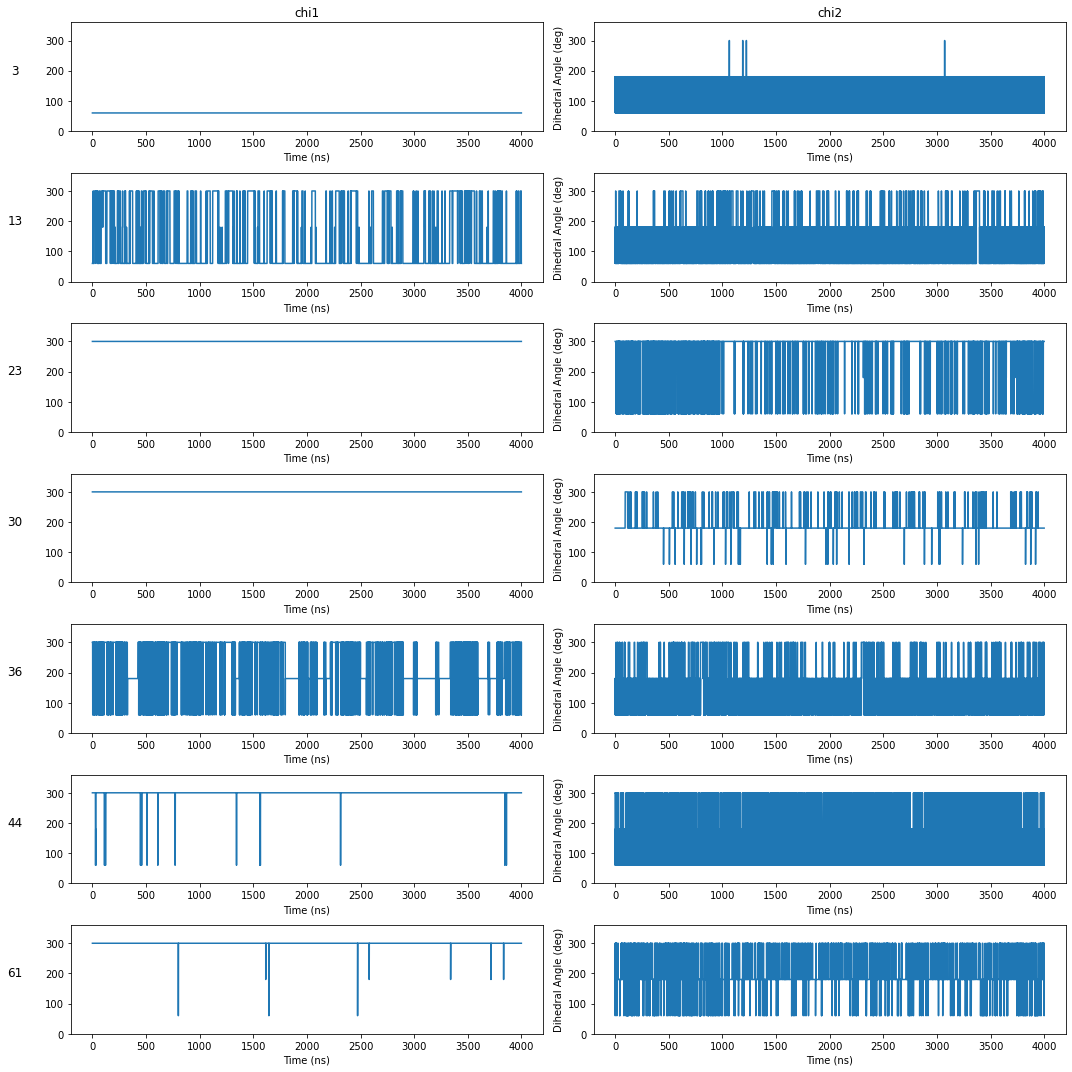

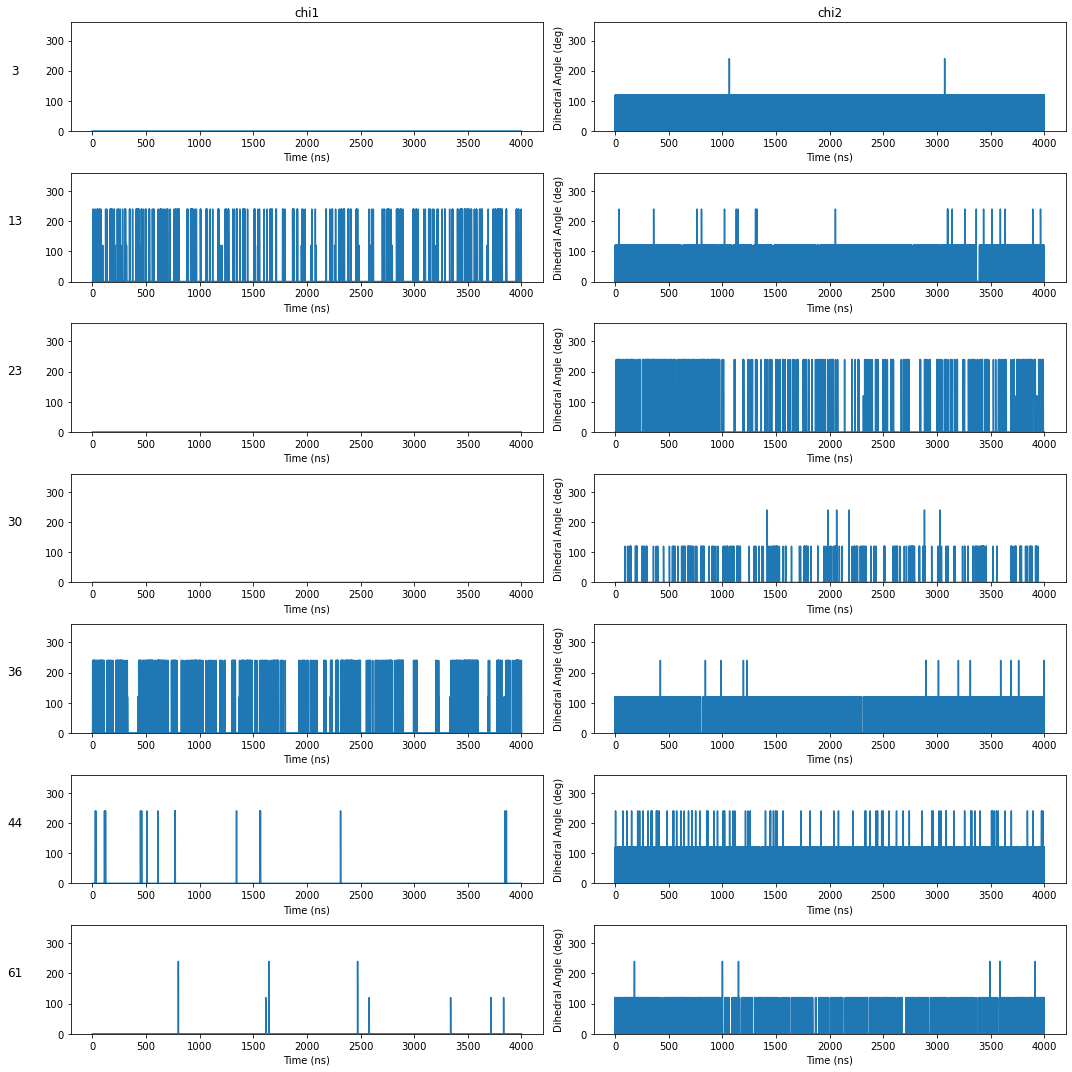

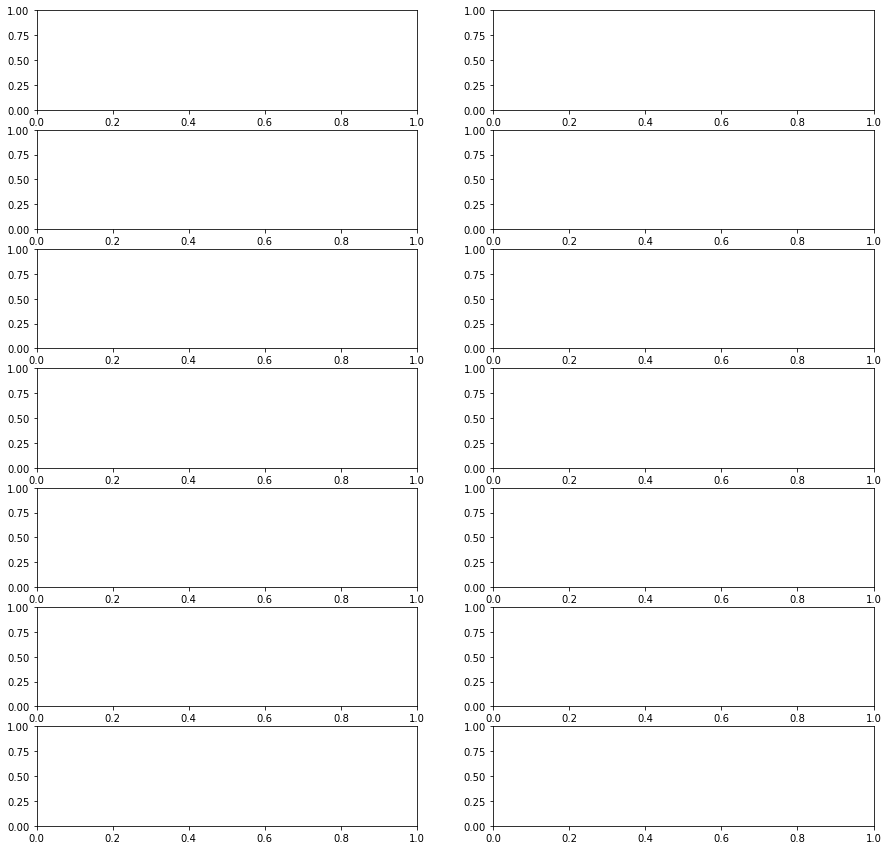

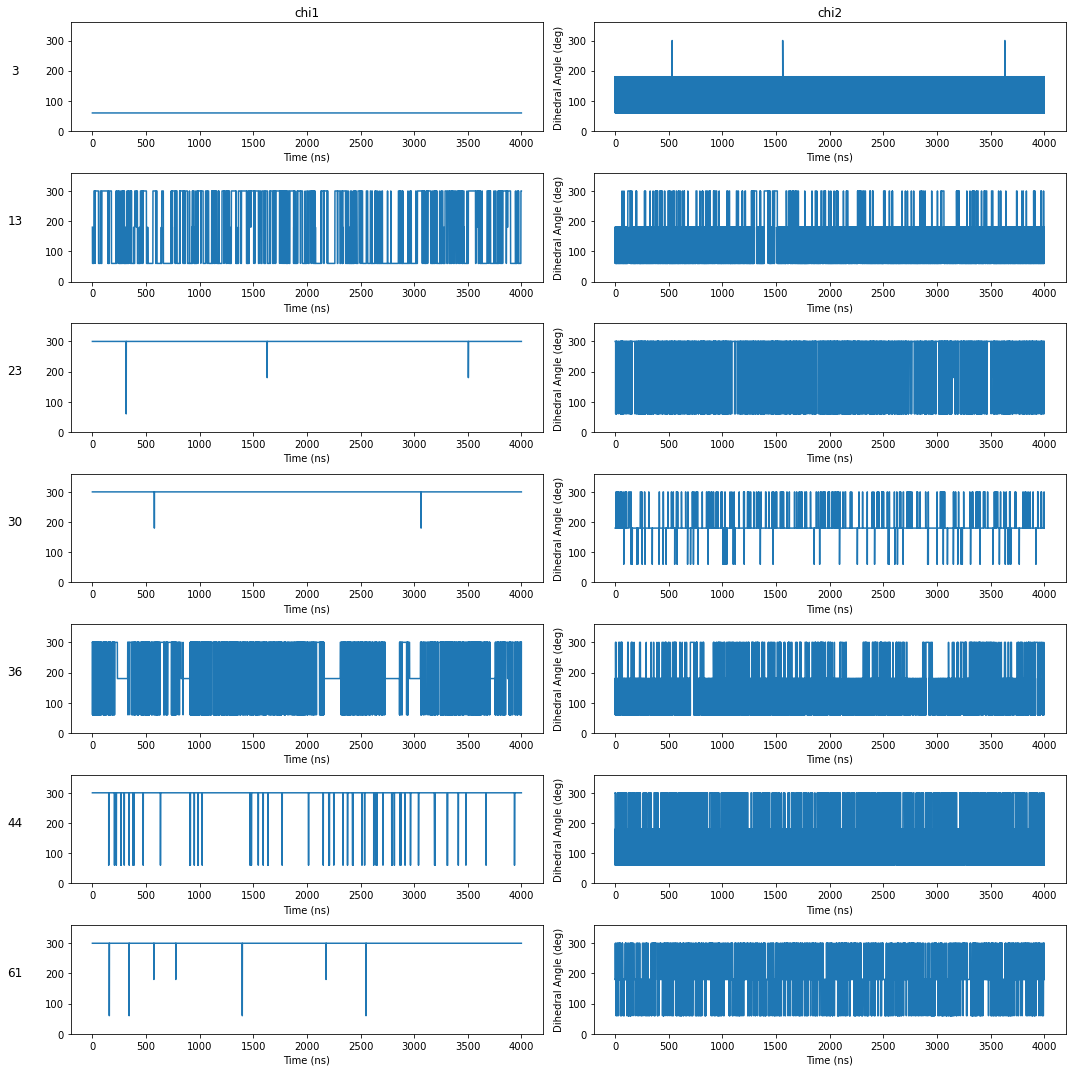

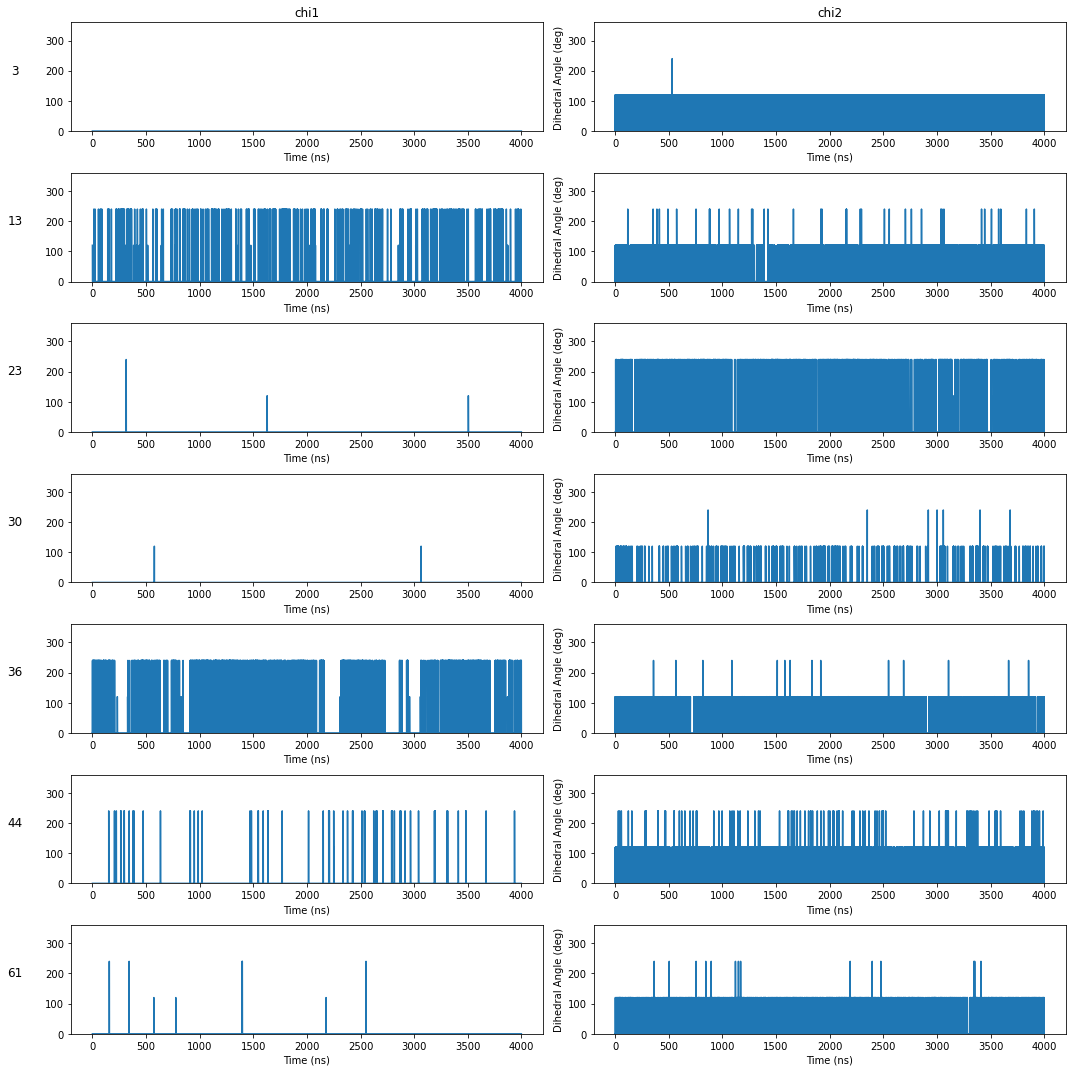

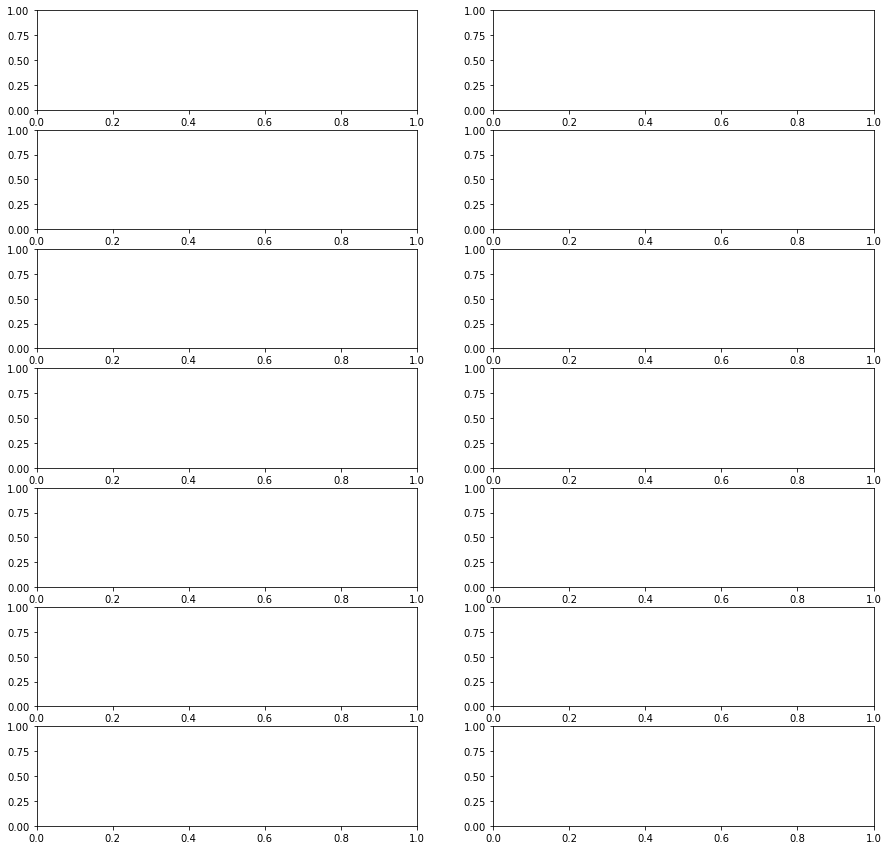

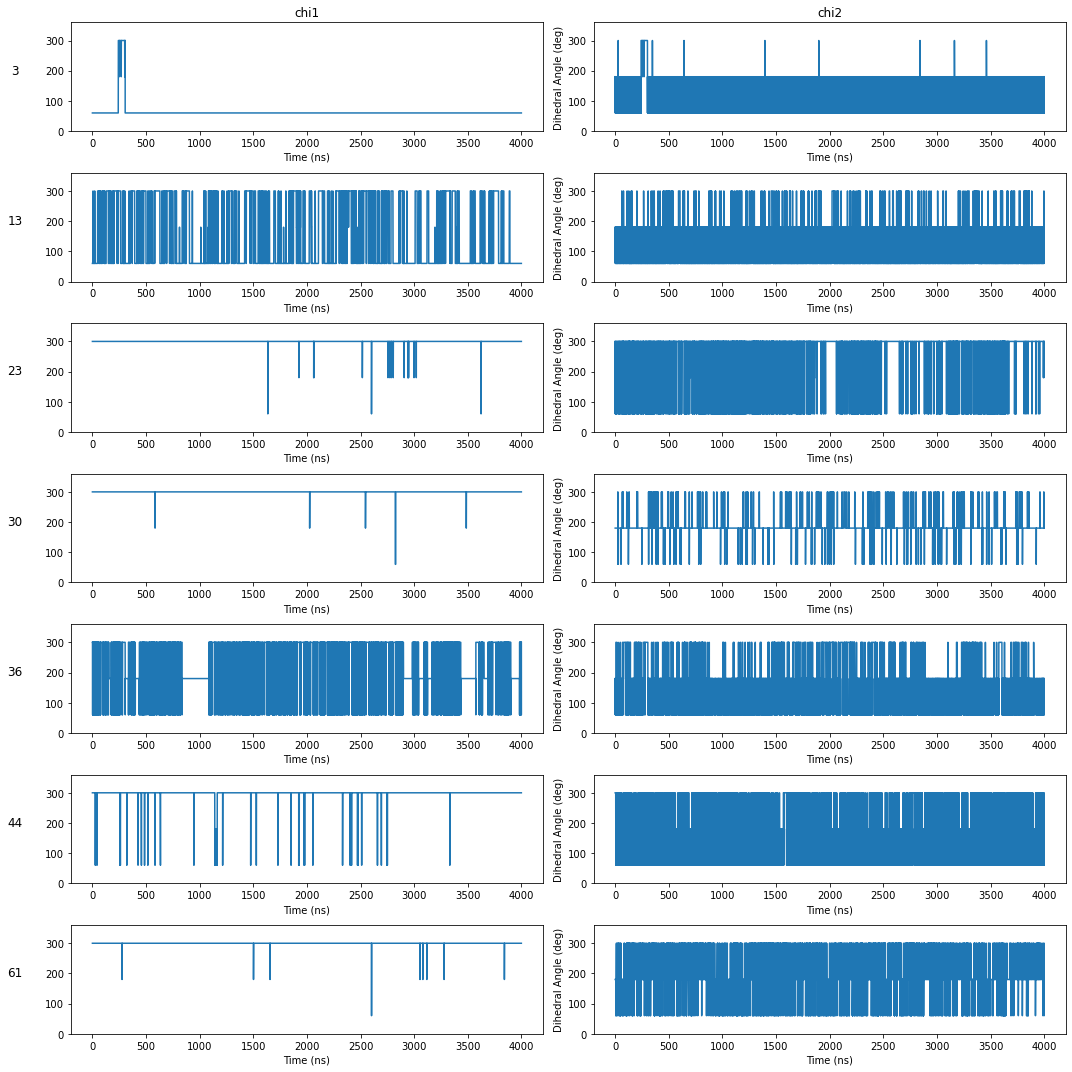

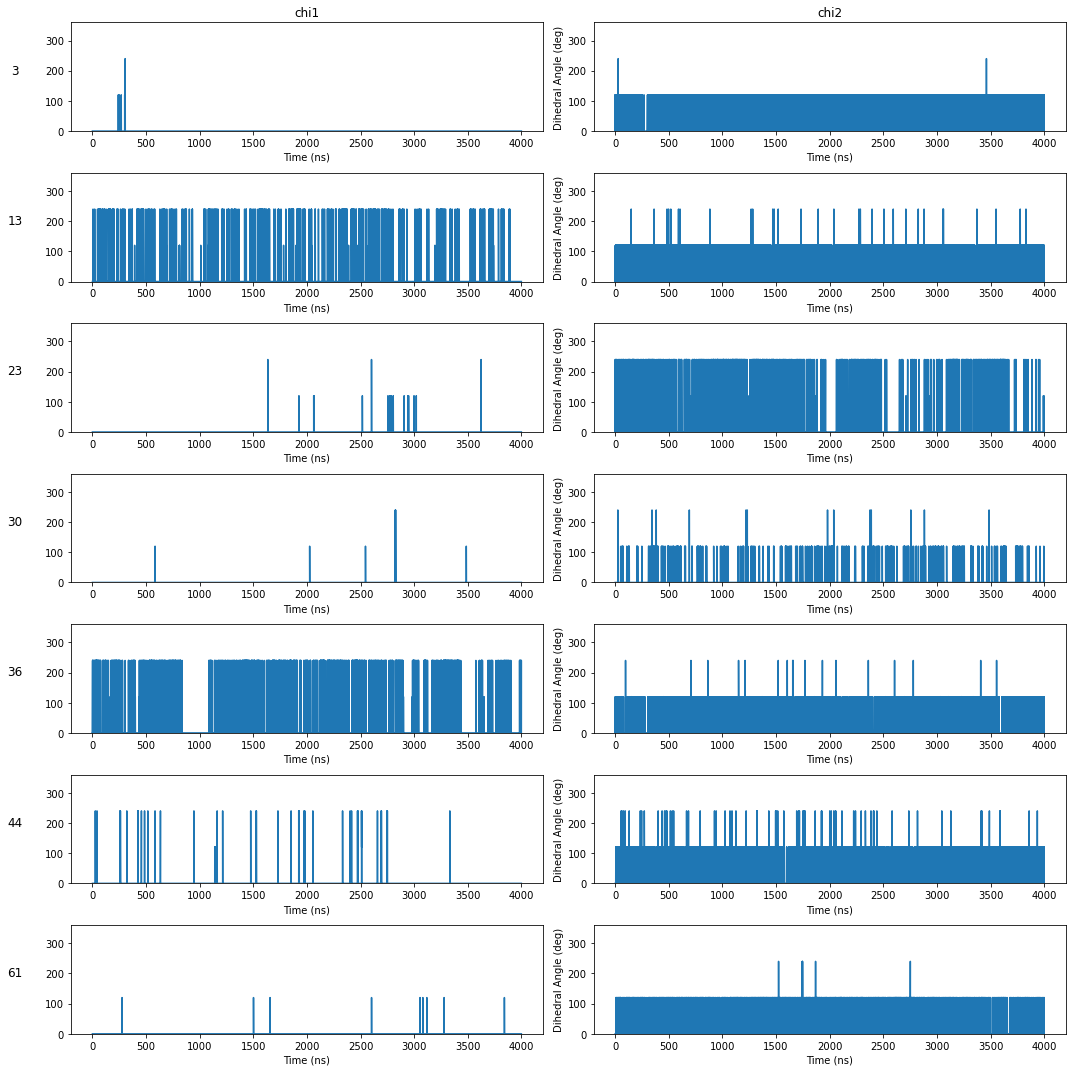

In [6]:
for test in test_list:
    traj_path = "/home/mlehner/1ubq/"+test+"/run_001/traj_4us_PBC_fit.xtc"
    #os.mkdir("../../out_figures/dihedral_analysis/"+test)
    chi1, chi2 = get_traj_data(topo, traj_path)
    chi1_bin = chi1.applymap(bin_dihedral_angles)
    chi1_bin.index = chi1.index/100
    chi2_bin = chi2.applymap(bin_dihedral_angles)
    chi2_bin.index = chi2.index/100
    fig, axs = plt.subplots(len(isoleucines), 2, figsize = [15,15])
    #--------------------------------------------------------------------------------
    fig, axs = plt.subplots(len(isoleucines), 2, figsize = [15,15])
    for i, ile in enumerate(isoleucines):
        axs[i,0].plot(chi1_bin[ile])
        axs[i,0].set_ylim([0, 360])
        axs[i,0].set_xlabel("Time (ns)")
        axs[i,0].set_ylabel("Dihedral Angle (deg)")
        axs[i,1].plot(chi2_bin[ile])
        axs[i,1].set_ylim([0, 360])
        axs[i,1].set_xlabel("Time (ns)")
        axs[i,1].set_ylabel("Dihedral Angle (deg)")
    for ax, col in zip(axs[0], ["chi1", "chi2"]):
        ax.set_title(col)
    for ax, row in zip(axs[:,0], isoleucines):
        ax.set_ylabel(row, rotation=0, size='large')
        #ax.xaxis.labelpad = 30
        ax.yaxis.labelpad = 30
    fig.tight_layout()
    plt.savefig("../../out_figures/dihedral_analysis/"+test+"/chi_binned.png")
    #--------------------------------------------------------------------------------
    chi1_diff = chi1_bin.diff().applymap(lambda x: np.abs(x))
    chi2_diff = chi2_bin.diff().applymap(lambda x: np.abs(x))
    fig, axs = plt.subplots(len(isoleucines), 2, figsize = [15,15])
    for i, ile in enumerate(isoleucines):
        axs[i,0].plot(chi1_diff[ile])
        axs[i,0].set_ylim([0, 360])
        axs[i,0].set_xlabel("Time (ns)")
        axs[i,0].set_ylabel("Dihedral Angle (deg)")
        axs[i,1].plot(chi2_diff[ile])
        axs[i,1].set_ylim([0, 360])
        axs[i,1].set_xlabel("Time (ns)")
        axs[i,1].set_ylabel("Dihedral Angle (deg)")
    for ax, col in zip(axs[0], ["chi1", "chi2"]):
        ax.set_title(col)
    for ax, row in zip(axs[:,0], isoleucines):
        ax.set_ylabel(row, rotation=0, size='large')
        #ax.xaxis.labelpad = 30
        ax.yaxis.labelpad = 30
    fig.tight_layout()
    plt.savefig("../../out_figures/dihedral_analysis/"+test+"/chi_binned_diff.png")
    #--------------------------------------------------------------------------------
    with open("../../out_figures/dihedral_analysis/"+test+"/chi_binned_counts.txt", "w") as f:
        for ile in isoleucines:
            count1 = (chi1_diff[ile] != 0).sum()
            count2 = (chi2_diff[ile] != 0).sum()
            f.writelines(f"{ile} \t {count1} \t {count2} \n")

In [7]:
count_list = []
for test in test_list:
    count = pd.read_csv("../../out_figures/dihedral_analysis/"+test+"/chi_binned_counts.txt", sep="\t", header=None, names=["chi1", "chi2"], index_col=0)
    count_list.append(count)

In [8]:
chi1_count = pd.concat([count["chi1"] for count in count_list], axis=1, keys=test_list)
chi2_count = pd.concat([count["chi2"] for count in count_list], axis=1, keys=test_list)

<AxesSubplot:>

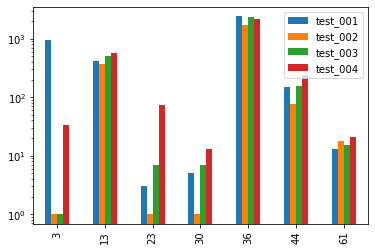

In [9]:
chi1_count.plot.bar(logy=True)

<AxesSubplot:>

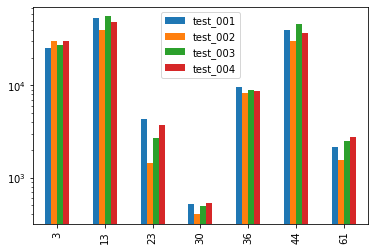

In [10]:
chi2_count.plot.bar(logy=True)